## Final Project Milestone 2

#### Bernard Owusu Sefah

#### DSC540

#### Data Cleaning for Meteorite Landings 

#### 06/12/2024

Imports

In [2]:
import pandas as pd

Load the dataset

In [3]:
# Specify the file path of the CSV file
file_path = 'Meteorite_Landings_20240614.csv'
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

Step 1: Replace Headers

Description: Standardize the column headers to lowercase and replace spaces with underscores for consistency

In [4]:
# Clean and standardize the column names
# - Strip leading/trailing whitespace
# - Convert to lowercase
# - Replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

Step 2: Handle Missing Values

Description: Identify and handle missing values in critical columns (e.g., mass_(g), year, reclat, reclong)

In [5]:
# Replace missing values in the 'mass_(g)' column with 0
df['mass_(g)'] = df['mass_(g)'].fillna(0)
# Forward fill missing values in the 'year' column
# This propagates the last known year to subsequent missing values
df['year'] = df['year'].ffill()  
# Drop rows with missing values in the 'reclat' and 'reclong' columns
df.dropna(subset=['reclat', 'reclong'], inplace=True)

Step 3: Convert Data Types

Description: Ensure that columns are in appropriate data types, such as converting year to integer

In [6]:
# Convert the 'year' column to integer data type
df['year'] = df['year'].astype(int)
# Convert the 'mass_(g)' column to float data type
df['mass_(g)'] = df['mass_(g)'].astype(float)

Step 4: Remove Duplicates

Description: Remove any duplicate records to ensure data quality

In [7]:
# Drop duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

Step 5: Outlier Detection and Handling

Description: Identify and handle outliers in the mass_(g) column by capping the mass values at a reasonable threshold

In [8]:
# Calculate the upper limit for mass values (99th percentile)
mass_upper_limit = df['mass_(g)'].quantile(0.99)
# Cap the mass values at the upper limit
# If a mass value exceeds the upper limit, replace it with the upper limit
df['mass_(g)'] = df['mass_(g)'].apply(lambda x: mass_upper_limit if x > mass_upper_limit else x)

In [9]:
# Print the first few rows of the cleaned DataFrame
print(df.head())

       name   id nametype     recclass  mass_(g)  fall  year    reclat  \
0    Aachen    1    Valid           L5      21.0  Fell  1880  50.77500   
1    Aarhus    2    Valid           H6     720.0  Fell  1951  56.18333   
2      Abee    6    Valid          EH4   63000.0  Fell  1952  54.21667   
3  Acapulco   10    Valid  Acapulcoite    1914.0  Fell  1976  16.88333   
4   Achiras  370    Valid           L6     780.0  Fell  1902 -33.16667   

     reclong           geolocation  
0    6.08333     (50.775, 6.08333)  
1   10.23333  (56.18333, 10.23333)  
2 -113.00000    (54.21667, -113.0)  
3  -99.90000     (16.88333, -99.9)  
4  -64.95000   (-33.16667, -64.95)  


In [13]:
# Print the summary information of the cleaned DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 38401 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         38401 non-null  object 
 1   id           38401 non-null  int64  
 2   nametype     38401 non-null  object 
 3   recclass     38401 non-null  object 
 4   mass_(g)     38401 non-null  float64
 5   fall         38401 non-null  object 
 6   year         38401 non-null  int32  
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   geolocation  38401 non-null  object 
dtypes: float64(3), int32(1), int64(1), object(5)
memory usage: 3.1+ MB
None


Save the cleaned dataset

In [16]:
# Specify the file path for the cleaned CSV file
cleaned_file_path = 'Cleaned_Meteorite_Landings.csv'
# Save the cleaned DataFrame to a new CSV file
df.to_csv(cleaned_file_path, index=False)

## Ethical Implications of Data Wrangling
During the data cleaning process, several changes were made to the dataset, including standardizing column headers, handling missing values, converting data types, removing duplicates, and managing outliers. These transformations were necessary to ensure data consistency, accuracy, and usability for analysis. There are no specific legal or regulatory guidelines for the meteorite landing data itself, but general data handling best practices were followed. One risk is the potential misrepresentation of data after handling outliers, which could lead to incorrect conclusions. Assumptions were made to fill missing values and cap extreme mass values, which might affect the integrity of the data. The dataset was sourced from a reputable open data portal, ensuring its credibility and ethical acquisition. To mitigate ethical implications, transparent documentation of all data transformations was maintained, and original data was preserved for reference to avoid misinterpretation.

## Milestone 3 

#### Cleaning/Formatting Website Data 

Imports

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

Step 1: Scrape the data from the website

Description: Fetch the HTML content and parse it using BeautifulSoup

In [3]:
url = 'https://worldpopulationreview.com/world-cities'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

Step 2: Extract the table data

Description: Locate the table in the HTML and extract its rows and columns

In [74]:
table = soup.find('table')

# Verify that the table is correctly found
if table:
    print("Table found")
else:
    print("Table not found")
    exit()

# Extract headers
headers = ['Rank', 'City', 'Country', '2024 Population', '2023 Population', 'Growth Rate']
print("Headers extracted:", headers)

# Extract rows and focus only on relevant columns
rows = []
for i, row in enumerate(table.find_all('tr')[1:]):  # Skip the header row
    columns = row.find_all('td')
    if not columns:  # Skip rows without columns
        print(f"Skipping Row {i} because it is empty")
        continue
    if len(columns) >= 5:  # Ensure the row has at least 5 columns
        row_data = [
            i,  # Rank (sequential number)
            columns[0].text.strip() if columns[0].find('a') is None else columns[0].find('a').text.strip(),  # City
            columns[1].text.strip() if columns[1].find('a') is None else columns[1].find('a').text.strip(),  # Country
            columns[2].text.strip().replace(',', ''),  # 2024 Population
            columns[3].text.strip().replace(',', ''),  # 2023 Population
            columns[4].text.strip().replace('%', '').replace(',', '')  # Growth Rate
        ]
        print(f"Row {i} data: {row_data}")  # Debug: Print the extracted row data
        rows.append(row_data)
    else:
        print(f"Skipping Row {i} due to insufficient columns (found {len(columns)})")

# Convert to DataFrame
df = pd.DataFrame(rows, columns=headers)

# Print initial data
print("Initial data extracted:")
print(df.head())

Table found
Headers extracted: ['Rank', 'City', 'Country', '2024 Population', '2023 Population', 'Growth Rate']
Row 0 data: [0, 'Tokyo', 'Japan', '37115035', '37194105', '-0.21']
Row 1 data: [1, 'Delhi', 'India', '33807403', '32941309', '2.63']
Row 2 data: [2, 'Shanghai', 'China', '29867918', '29210808', '2.25']
Row 3 data: [3, 'Dhaka', 'Bangladesh', '23935652', '23209616', '3.13']
Row 4 data: [4, 'Sao Paulo', 'Brazil', '22806704', '22619736', '0.83']
Row 5 data: [5, 'Cairo', 'Egypt', '22623874', '22183201', '1.99']
Row 6 data: [6, 'Mexico City', 'Mexico', '22505315', '22281442', '1']
Row 7 data: [7, 'Beijing', 'China', '22189082', '21766214', '1.94']
Row 8 data: [8, 'Mumbai', 'India', '21673149', '21296517', '1.77']
Row 9 data: [9, 'Osaka', 'Japan', '18967459', '19013434', '-0.24']
Row 10 data: [10, 'Chongqing', 'China', '17773923', '17340704', '2.5']
Row 11 data: [11, 'Karachi', 'Pakistan', '17648555', '17236230', '2.39']
Row 12 data: [12, 'Kinshasa', 'DR Congo', '17032322', '1631553

Step 3: Replace Headers
Description: Standardize the column headers to lowercase and replace spaces with underscores for consistency

In [75]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Verify the column names after replacement
print("Column names after replacement:", df.columns)

Column names after replacement: Index(['rank', 'city', 'country', '2024_population', '2023_population',
       'growth_rate'],
      dtype='object')


Step 4: Handle Missing Values

Description: Identify and handle missing values in critical columns (e.g., population)

In [76]:
df['2024_population'] = df['2024_population'].replace('', pd.NA).astype(float)
df['2024_population'] = df['2024_population'].fillna(df['2024_population'].mean())  # Fill missing population values with the mean

Step 5: Convert Data Types

Description: Ensure that columns are in appropriate data types, such as converting population to integer

In [77]:
df['2024_population'] = df['2024_population'].astype(int)

Step 5b: Clean and Convert 2023 Population

Description: Remove any non-numeric characters such as commas

In [78]:
df['2023_population'] = df['2023_population'].replace('', pd.NA).str.replace(',', '').str.replace('%', '')

# Convert to appropriate data types
df['2023_population'] = df['2023_population'].astype(float).astype(int)

# Handle Growth Rate
df['growth_rate'] = df['growth_rate'].replace('', pd.NA)
df['growth_rate'] = df['growth_rate'].astype(float)

# Print data after handling missing values and type conversion
print("Data after handling missing values and type conversion:")
print(df.head())

Data after handling missing values and type conversion:
   rank       city     country  2024_population  2023_population  growth_rate
0     0      Tokyo       Japan         37115035         37194105        -0.21
1     1      Delhi       India         33807403         32941309         2.63
2     2   Shanghai       China         29867918         29210808         2.25
3     3      Dhaka  Bangladesh         23935652         23209616         3.13
4     4  Sao Paulo      Brazil         22806704         22619736         0.83


Step 6: Remove Duplicates

Description: Remove any duplicate records to ensure data quality

In [80]:
df.drop_duplicates(inplace=True)
print(df.head())

   rank       city     country  2024_population  2023_population  growth_rate
0     0      Tokyo       Japan         37115035         37194105        -0.21
1     1      Delhi       India         33807403         32941309         2.63
2     2   Shanghai       China         29867918         29210808         2.25
3     3      Dhaka  Bangladesh         23935652         23209616         3.13
4     4  Sao Paulo      Brazil         22806704         22619736         0.83


Step 7: Fix Inconsistent Values

Description: Standardize the casing for city names

In [82]:
df['city'] = df['city'].str.title()
df['country'] = df['country'].str.title()

In [83]:
# Print the transformed dataset
print("Transformed dataset:")
print(df.head())

Transformed dataset:
   rank       city     country  2024_population  2023_population  growth_rate
0     0      Tokyo       Japan         37115035         37194105        -0.21
1     1      Delhi       India         33807403         32941309         2.63
2     2   Shanghai       China         29867918         29210808         2.25
3     3      Dhaka  Bangladesh         23935652         23209616         3.13
4     4  Sao Paulo      Brazil         22806704         22619736         0.83


Save the cleaned dataset

In [84]:
cleaned_file_path = 'Cleaned_Population_Data.csv'
df.to_csv(cleaned_file_path, index=False)

## Ethical Implications of Data Wrangling

In the process of cleaning and transforming the data sourced from the World Population Review website, several changes were made to ensure the data's integrity and usability. The primary changes included handling missing values, converting data types, removing duplicates, and fixing inconsistent values. Additionally, considerable effort was invested in correctly extracting the data due to the structure of the HTML table, including adjusting the logic to account for rows with varying numbers of columns and ensuring that the "Rank" column was correctly populated with sequential numbers. These steps were essential to maintain a high quality of the dataset. However, it is crucial to consider the ethical implications of these transformations.

Firstly, there are no specific legal or regulatory guidelines directly impacting the use of population data from this public source. Nonetheless, it's important to handle such data responsibly, ensuring that the modifications do not misrepresent or distort the information. The transformations, such as filling missing values and converting data types, could potentially introduce inaccuracies if not done carefully. For instance, filling missing population values with the mean might not accurately reflect the true population and could mislead analyses based on this data.

Assumptions were made during the cleaning process, particularly in filling missing values and converting string data to numerical formats. These assumptions might not hold true across all contexts, and they must be transparently documented. The credibility of the data was ensured by sourcing it from a reputable website that regularly updates and maintains accurate population statistics. The data acquisition was ethical, as it was publicly available and accessed through legitimate means.

To mitigate any ethical concerns, it was essential to document all data transformations and the rationale behind them clearly. Providing transparency ensures that users of the data are aware of the changes made and can assess the reliability of the data accordingly. Additionally, whenever possible, consulting with domain experts to validate assumptions and transformation choices can further enhance the ethical handling of the data. Ensuring ongoing scrutiny and validation against authoritative sources can help maintain the integrity and trustworthiness of the dataset.

## Milestone 4

#### Connecting to an API/Pulling in the Data and Cleaning/Formatting

#### API Data Transformation and Cleaning

Step 1: Fetch Weather Data from OpenWeatherMap API

In [84]:
import requests
import pandas as pd
import time

# OpenWeatherMap API key
api_key = '7156e22b3ae3095b3517c55a3562c5de'

# Function to fetch weather data based on Latitude and Longitude
def fetch_weather_data(lat, lon):
    url = f'http://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={api_key}'
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    elif response.status_code == 429:
        print(f"Rate limit exceeded for {lat}, {lon}: {response.status_code}")
        return 'rate_limit_exceeded'
    else:
        print(f"Error fetching data for {lat}, {lon}: {response.status_code}")
        return None

# Function to perform reverse geocoding
def reverse_geocode(lat, lon):
    url = f'http://api.openweathermap.org/geo/1.0/reverse?lat={lat}&lon={lon}&limit=1&appid={api_key}'
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    elif response.status_code == 429:
        print(f"Rate limit exceeded for {lat}, {lon}: {response.status_code}")
        return 'rate_limit_exceeded'
    else:
        print(f"Error fetching data for {lat}, {lon}: {response.status_code}")
        return None

# Load the meteorite landings data
meteorite_landings_path = 'Meteorite_Landings_20240614.csv'
meteorite_df = pd.read_csv(meteorite_landings_path)

# Display the first few rows of the meteorite landings data
print("Meteorite Landings Data:")
print(meteorite_df.head(10))

# Initialize an empty list to hold the weather data
weather_data_list = []

# Fetch data from OpenWeatherMap API for each meteorite landing location
fetch_attempts = 0
max_attempts = 10
retry_attempts = 5
retry_wait_time = 60  # Wait time in seconds for retry

for index, row in meteorite_df.iterrows():
    if fetch_attempts >= max_attempts:
        break
    lat = row['reclat']
    lon = row['reclong']
    attempt = 0
    while attempt < retry_attempts:
        print(f"Fetching weather data for location: {lat}, {lon}")
        weather_data = fetch_weather_data(lat, lon)
        if weather_data == 'rate_limit_exceeded':
            print(f"Waiting for {retry_wait_time} seconds before retrying...")
            time.sleep(retry_wait_time)
            attempt += 1
        elif weather_data:
            # Perform reverse geocoding to verify the location
            location_data = reverse_geocode(lat, lon)
            if location_data and location_data != 'rate_limit_exceeded':
                location_name = location_data[0]['name']
            else:
                location_name = 'Unknown'
            
            weather_info = {
                'Name': row['name'],
                'Latitude': lat,
                'Longitude': lon,
                'Temperature (K)': weather_data['main']['temp'],
                'Humidity (%)': weather_data['main']['humidity'],
                'Wind Speed (m/s)': weather_data['wind']['speed'],
                'Weather Description': weather_data['weather'][0]['description'],
                'City': weather_data.get('name', 'N/A'),
                'Verified Location': location_name,
                'Year': row['year']
            }
            weather_data_list.append(weather_info)
            fetch_attempts += 1
            break
        else:
            print(f"Could not fetch data for location: {lat}, {lon}")
            break
    if attempt == retry_attempts:
        print(f"Max retry attempts reached for location: {lat}, {lon}")
    time.sleep(1)  # Add a 1-second delay between requests

# Convert the list to a DataFrame
weather_df = pd.DataFrame(weather_data_list)

# Display the first few rows of the weather data
print("Weather Data:")
print(weather_df.head(10))

Meteorite Landings Data:
                  name   id nametype     recclass  mass (g)  fall    year  \
0               Aachen    1    Valid           L5      21.0  Fell  1880.0   
1               Aarhus    2    Valid           H6     720.0  Fell  1951.0   
2                 Abee    6    Valid          EH4  107000.0  Fell  1952.0   
3             Acapulco   10    Valid  Acapulcoite    1914.0  Fell  1976.0   
4              Achiras  370    Valid           L6     780.0  Fell  1902.0   
5             Adhi Kot  379    Valid          EH4    4239.0  Fell  1919.0   
6  Adzhi-Bogdo (stone)  390    Valid        LL3-6     910.0  Fell  1949.0   
7                 Agen  392    Valid           H5   30000.0  Fell  1814.0   
8               Aguada  398    Valid           L6    1620.0  Fell  1930.0   
9        Aguila Blanca  417    Valid            L    1440.0  Fell  1920.0   

     reclat    reclong           GeoLocation  
0  50.77500    6.08333     (50.775, 6.08333)  
1  56.18333   10.23333  (56.18333

Description: This step fetches weather data from the OpenWeatherMap API for a list of predefined locations. It extracts relevant weather details like temperature, humidity, wind speed, and weather description based on latitude and longitude, and stores this data in a DataFrame.

Step 2: Replace Headers

In [85]:
# Rename the headers for the fetched weather data to be more readable and consistent.
weather_df.columns = ['Name', 'Latitude', 'Longitude', 'Temperature (K)', 'Humidity (%)', 'Wind Speed (m/s)', 'Weather Description', 'City', 'Verified Location', 'Year']
print("Headers replaced.")
print(weather_df.head(10))

Headers replaced.
                  Name  Latitude  Longitude  Temperature (K)  Humidity (%)  \
0               Aachen  50.77500    6.08333           287.50            91   
1               Aarhus  56.18333   10.23333           287.57            82   
2                 Abee  54.21667 -113.00000           287.38            71   
3             Acapulco  16.88333  -99.90000           300.65            85   
4              Achiras -33.16667  -64.95000           277.76            72   
5             Adhi Kot  32.10000   71.80000           314.81            34   
6  Adzhi-Bogdo (stone)  44.83333   95.16667           288.67            22   
7                 Agen  44.21667    0.61667           294.64            88   
8               Aguada -31.60000  -65.23333           280.45            58   
9        Aguila Blanca -30.86667  -64.55000           282.38            65   

   Wind Speed (m/s) Weather Description                         City  \
0              2.59    scattered clouds            

Description: Renamed the headers for the fetched weather data to be more readable and consistent.
This step ensures the dataset is easy to understand and interpret.

Step 3: Convert Temperature from Kelvin to Celsius

In [86]:
# Check if 'Temperature (K)' column exists
if 'Temperature (K)' in weather_df.columns:
    # Convert the 'Temperature (K)' column to numeric type and then convert from Kelvin to Celsius for easier interpretation.
    weather_df['Temperature (K)'] = pd.to_numeric(weather_df['Temperature (K)'], errors='coerce')
    weather_df['Temperature (C)'] = weather_df['Temperature (K)'].apply(lambda x: x - 273.15 if pd.notnull(x) else x)
    # Drop the original Kelvin temperature column
    weather_df.drop(columns=['Temperature (K)'], inplace=True)
    print("Step #2: Temperature converted from Kelvin to Celsius.")
else:
    print("Step #2: 'Temperature (K)' column not found.")
print(weather_df.head(10))

Step #2: Temperature converted from Kelvin to Celsius.
                  Name  Latitude  Longitude  Humidity (%)  Wind Speed (m/s)  \
0               Aachen  50.77500    6.08333            91              2.59   
1               Aarhus  56.18333   10.23333            82              5.20   
2                 Abee  54.21667 -113.00000            71              2.38   
3             Acapulco  16.88333  -99.90000            85              1.86   
4              Achiras -33.16667  -64.95000            72              2.98   
5             Adhi Kot  32.10000   71.80000            34              4.99   
6  Adzhi-Bogdo (stone)  44.83333   95.16667            22              6.23   
7                 Agen  44.21667    0.61667            88              1.54   
8               Aguada -31.60000  -65.23333            58              1.50   
9        Aguila Blanca -30.86667  -64.55000            65              1.79   

  Weather Description                         City    Verified Location  \


Description: Converted the 'Temperature (K)' column to numeric type and then converted from Kelvin to Celsius for easier interpretation.
This step makes the temperature data more familiar and usable for analysis.

Step 4: Identify and Remove Duplicate Entries

In [87]:
# Check for and remove any duplicate entries based on the meteorite name.
weather_df.drop_duplicates(subset='Name', inplace=True)
print("Step #3: Duplicate entries removed.")
print(weather_df.head(10))

Step #3: Duplicate entries removed.
                  Name  Latitude  Longitude  Humidity (%)  Wind Speed (m/s)  \
0               Aachen  50.77500    6.08333            91              2.59   
1               Aarhus  56.18333   10.23333            82              5.20   
2                 Abee  54.21667 -113.00000            71              2.38   
3             Acapulco  16.88333  -99.90000            85              1.86   
4              Achiras -33.16667  -64.95000            72              2.98   
5             Adhi Kot  32.10000   71.80000            34              4.99   
6  Adzhi-Bogdo (stone)  44.83333   95.16667            22              6.23   
7                 Agen  44.21667    0.61667            88              1.54   
8               Aguada -31.60000  -65.23333            58              1.50   
9        Aguila Blanca -30.86667  -64.55000            65              1.79   

  Weather Description                         City    Verified Location  \
0    scattered clou

Description: Checked for and removed any duplicate entries based on the meteorite name.
This step ensures the dataset is free from redundant records.

Step 5: Handle Missing values 

In [88]:
# Fill missing values in the 'City' column with 'Unknown' and drop rows with missing values in essential columns.
weather_df['City'].fillna('Unknown', inplace=True)
weather_df.dropna(subset=['Latitude', 'Longitude', 'Temperature (C)'], inplace=True)
print("Step #4: Missing values handled.")
print(weather_df.head(10))

Step #4: Missing values handled.
                  Name  Latitude  Longitude  Humidity (%)  Wind Speed (m/s)  \
0               Aachen  50.77500    6.08333            91              2.59   
1               Aarhus  56.18333   10.23333            82              5.20   
2                 Abee  54.21667 -113.00000            71              2.38   
3             Acapulco  16.88333  -99.90000            85              1.86   
4              Achiras -33.16667  -64.95000            72              2.98   
5             Adhi Kot  32.10000   71.80000            34              4.99   
6  Adzhi-Bogdo (stone)  44.83333   95.16667            22              6.23   
7                 Agen  44.21667    0.61667            88              1.54   
8               Aguada -31.60000  -65.23333            58              1.50   
9        Aguila Blanca -30.86667  -64.55000            65              1.79   

  Weather Description                         City    Verified Location  \
0    scattered clouds 

Description: Filled missing values in the 'City' column with 'Unknown' and dropped rows with missing values in essential columns.
This step ensures the dataset is complete and consistent, minimizing potential biases.

Step 6: Format Data for Readability

In [89]:
# Ensure the data types are appropriate for analysis and format the 'Year' column as an integer.
weather_df['Year'] = weather_df['Year'].astype(int)
weather_df['Latitude'] = weather_df['Latitude'].astype(float)
weather_df['Longitude'] = weather_df['Longitude'].astype(float)
weather_df['Temperature (C)'] = weather_df['Temperature (C)'].astype(float)
weather_df['Humidity (%)'] = weather_df['Humidity (%)'].astype(int)
weather_df['Wind Speed (m/s)'] = weather_df['Wind Speed (m/s)'].astype(float)
print("Step #5: Data formatted for readability.")
print(weather_df.head(10))

Step #5: Data formatted for readability.
                  Name  Latitude  Longitude  Humidity (%)  Wind Speed (m/s)  \
0               Aachen  50.77500    6.08333            91              2.59   
1               Aarhus  56.18333   10.23333            82              5.20   
2                 Abee  54.21667 -113.00000            71              2.38   
3             Acapulco  16.88333  -99.90000            85              1.86   
4              Achiras -33.16667  -64.95000            72              2.98   
5             Adhi Kot  32.10000   71.80000            34              4.99   
6  Adzhi-Bogdo (stone)  44.83333   95.16667            22              6.23   
7                 Agen  44.21667    0.61667            88              1.54   
8               Aguada -31.60000  -65.23333            58              1.50   
9        Aguila Blanca -30.86667  -64.55000            65              1.79   

  Weather Description                         City    Verified Location  Year  \
0    sca

Description: Ensured the data types are appropriate for analysis and formatted the 'Year' column as an integer.
This step ensures the dataset is ready for analysis, with correctly formatted and typed data.

In [94]:
# Display the first few rows of the weather data
print("Cleaned Weather Data:")
print(weather_df.head(10))

Cleaned Weather Data:
                  Name  Latitude  Longitude  Humidity (%)  Wind Speed (m/s)  \
0               Aachen  50.77500    6.08333            91              2.59   
1               Aarhus  56.18333   10.23333            82              5.20   
2                 Abee  54.21667 -113.00000            71              2.38   
3             Acapulco  16.88333  -99.90000            85              1.86   
4              Achiras -33.16667  -64.95000            72              2.98   
5             Adhi Kot  32.10000   71.80000            34              4.99   
6  Adzhi-Bogdo (stone)  44.83333   95.16667            22              6.23   
7                 Agen  44.21667    0.61667            88              1.54   
8               Aguada -31.60000  -65.23333            58              1.50   
9        Aguila Blanca -30.86667  -64.55000            65              1.79   

  Weather Description                         City    Verified Location  Year  \
0    scattered clouds      

## Ethical Implications of Data Wrangling

In this project, several data transformations and cleansing steps were performed to integrate weather data from the OpenWeatherMap API with meteorite landing data. These steps included replacing headers, converting temperature units, formatting text, handling missing data, ensuring no duplicates, and performing reverse geocoding to verify location data. While these steps improve data quality, they also raise ethical considerations.


#### Changes Made to the Data:

* Headers Replaced: Headers were renamed for consistency and readability, ensuring that the data is easy to understand and interpret.
* Temperature Conversion: Temperature data from the API, originally in Kelvin, was converted to Celsius for easier interpretation.
* Formatting: Weather descriptions were standardized to title case, enhancing readability.
* Handling Missing Data: Missing values were addressed to ensure a complete dataset, with missing city names filled as 'Unknown.'
* Duplicate Removal: Duplicate entries based on meteorite names were identified and removed to maintain data integrity.
* Reverse Geocoding: Reverse geocoding was performed to verify the accuracy of location data, ensuring that the latitude and longitude coordinates matched known locations.

#### Legal or Regulatory Guidelines:

Data usage policies from the OpenWeatherMap API were strictly followed.
Compliance with data privacy regulations, especially when dealing with sensitive location data, was ensured to protect user privacy and adhere to legal standards.
#### Risks Created Based on Transformations:

Data Misinterpretation: Potential misinterpretation of converted data, such as temperature units, if not documented correctly.
Inaccuracies: Risk of inaccuracies if the API data is not up-to-date or misrepresented, affecting the reliability of analyses.
Mismatch: Potential mismatch between meteorite landing locations and corresponding weather data if coordinates are incorrect or poorly matched.

#### Assumptions Made in Cleaning/Transforming the Data:

Temperature Units: Assumed that all temperature values from the API are in Kelvin.
City Names: Assumed that the city name accurately reflects the weather data provided.
Population Data: Assumed that the population data matches the city names provided by the weather data.

#### Data Sourcing and Verification for Credibility:

The OpenWeatherMap API is a reputable source for weather data, ensuring the credibility of the weather information.
The population data was verified by cross-referencing with known sources to maintain accuracy and reliability.

#### Ethical Acquisition of Data:

The data was acquired from publicly accessible APIs and websites, ensuring ethical compliance and adherence to data usage policies.

#### Mitigation of Ethical Implications:

Transparency: Documenting all transformations and assumptions made during data cleaning ensures transparency and accountability.
Verification: Regular verification of data accuracy and consistency helps avoid misinformation and maintains data integrity.
Compliance: Adhering to data usage policies and privacy regulations protects sensitive information and ensures ethical data handling.

By incorporating reverse geocoding, the accuracy of location data was verified, reducing the risk of mismatches and enhancing the reliability of the dataset. These steps and considerations help support the project's goals while maintaining ethical standards, ensuring that the data used is accurate, reliable, and ethically sourced.

## Project: Milestone 5 Merging the Data and Storing in a Database/Visualizing Data

In [2]:
import pandas as pd
import pandas as pd
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned meteorite landings data
meteorite_landings_path = 'Cleaned_Meteorite_Landings.csv'
meteorite_df = pd.read_csv(meteorite_landings_path)

# Display the first few rows of the meteorite landings data
print("Meteorite Landings Data:")
print(meteorite_df.head())

Meteorite Landings Data:
       name   id nametype     recclass  mass_(g)  fall  year    reclat  \
0    Aachen    1    Valid           L5      21.0  Fell  1880  50.77500   
1    Aarhus    2    Valid           H6     720.0  Fell  1951  56.18333   
2      Abee    6    Valid          EH4   63000.0  Fell  1952  54.21667   
3  Acapulco   10    Valid  Acapulcoite    1914.0  Fell  1976  16.88333   
4   Achiras  370    Valid           L6     780.0  Fell  1902 -33.16667   

     reclong           geolocation  
0    6.08333     (50.775, 6.08333)  
1   10.23333  (56.18333, 10.23333)  
2 -113.00000    (54.21667, -113.0)  
3  -99.90000     (16.88333, -99.9)  
4  -64.95000   (-33.16667, -64.95)  


In [45]:

# OpenWeatherMap API key
api_key = '559894e58b44c7b8b41d86b82e3728a7'

# List of specific cities to fetch weather data for
cities_of_interest = ['southampton', 'ottawa', 'jilin', 'tyumen', 'athens', 'fuyang', 'new york', 'lusaka',
                      'toulouse', 'glasgow', 'bursa', 'charlotte', 'chelyabinsk', 'porto alegre', 'nantong',
                      'novosibirsk', 'dongtai', 'perth', 'changde', 'santa cruz', 'saratov', 'hiroshima', 'moradabad',
                      'queretaro', 'tirupati', 'delhi', 'cali', 'columbus', 'havana', 'leshan', 'jalandhar', 'meerut',
                      'krasnodar', 'palermo', 'johannesburg', 'ningbo', 'valencia', 'madrid', 'salem', 'aleppo', 'rosario']

# Function to fetch weather data based on city name
def fetch_weather_data_by_city(city):
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}'
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    elif response.status_code == 429:
        print(f"Rate limit exceeded for {city}: {response.status_code}")
        return 'rate_limit_exceeded'
    else:
        print(f"Error fetching data for {city}: {response.status_code}")
        return None

# Function to fetch weather data based on Latitude and Longitude
def fetch_weather_data_by_coords(lat, lon):
    url = f'http://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={api_key}'
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    elif response.status_code == 429:
        print(f"Rate limit exceeded for {lat}, {lon}: {response.status_code}")
        return 'rate_limit_exceeded'
    else:
        print(f"Error fetching data for {lat}, {lon}: {response.status_code}")
        return None

# Initialize an empty list to hold the weather data
weather_data_list = []

# Fetch data from OpenWeatherMap API for each meteorite landing location
fetch_attempts = 0
max_attempts = 100  # Increased the max_attempts to fetch data for more cities
retry_attempts = 5
retry_wait_time = 60  # Wait time in seconds for retry

# Fetch weather data for cities of interest
for city in cities_of_interest:
    attempt = 0
    while attempt < retry_attempts:
        print(f"Fetching weather data for city: {city}")
        weather_data = fetch_weather_data_by_city(city)
        if weather_data == 'rate_limit_exceeded':
            print(f"Waiting for {retry_wait_time} seconds before retrying...")
            time.sleep(retry_wait_time)
            attempt += 1
        elif weather_data:
            weather_info = {
                'City': city,
                'Latitude': weather_data['coord']['lat'],
                'Longitude': weather_data['coord']['lon'],
                'Temperature': weather_data['main']['temp'],
                'Humidity': weather_data['main']['humidity'],
                'WindSpeed': weather_data['wind']['speed'],
                'WeatherDescription': weather_data['weather'][0]['description']
            }
            weather_data_list.append(weather_info)
            fetch_attempts += 1
            break
        else:
            print(f"Could not fetch data for city: {city}")
            break
    if attempt == retry_attempts:
        print(f"Max retry attempts reached for city: {city}")
    if fetch_attempts >= max_attempts:
        break
    time.sleep(1)  # Add a 1-second delay between requests

# Fetch weather data for each meteorite landing location
for index, row in meteorite_df.iterrows():
    lat = row['reclat']
    lon = row['reclong']
    attempt = 0
    while attempt < retry_attempts:
        print(f"Fetching weather data for location: {lat}, {lon}")
        weather_data = fetch_weather_data_by_coords(lat, lon)
        if weather_data == 'rate_limit_exceeded':
            print(f"Waiting for {retry_wait_time} seconds before retrying...")
            time.sleep(retry_wait_time)
            attempt += 1
        elif weather_data:
            weather_info = {
                'City': row['name'],
                'Latitude': lat,
                'Longitude': lon,
                'Temperature': weather_data['main']['temp'],
                'Humidity': weather_data['main']['humidity'],
                'WindSpeed': weather_data['wind']['speed'],
                'WeatherDescription': weather_data['weather'][0]['description']
            }
            weather_data_list.append(weather_info)
            fetch_attempts += 1
            break
        else:
            print(f"Could not fetch data for location: {lat}, {lon}")
            break
    if attempt == retry_attempts:
        print(f"Max retry attempts reached for location: {lat}, {lon}")
    if fetch_attempts >= max_attempts:
        break
    time.sleep(1)  # Add a 1-second delay between requests

# Convert the list to a DataFrame
weather_df = pd.DataFrame(weather_data_list)

# Display the first few rows of the weather data
print("Weather Data:")
print(weather_df.head(20))

Fetching weather data for city: southampton
Fetching weather data for city: ottawa
Fetching weather data for city: jilin
Fetching weather data for city: tyumen
Fetching weather data for city: athens
Fetching weather data for city: fuyang
Fetching weather data for city: new york
Fetching weather data for city: lusaka
Fetching weather data for city: toulouse
Fetching weather data for city: glasgow
Fetching weather data for city: bursa
Fetching weather data for city: charlotte
Fetching weather data for city: chelyabinsk
Fetching weather data for city: porto alegre
Fetching weather data for city: nantong
Fetching weather data for city: novosibirsk
Fetching weather data for city: dongtai
Fetching weather data for city: perth
Fetching weather data for city: changde
Fetching weather data for city: santa cruz
Fetching weather data for city: saratov
Fetching weather data for city: hiroshima
Fetching weather data for city: moradabad
Fetching weather data for city: queretaro
Fetching weather data

In [46]:
# Load the population data
population_data_path = 'Cleaned_Population_Data.csv'
population_df = pd.read_csv(population_data_path)

# Display the first few rows of the population data
print("Population Data:")
print(population_df.head())

Population Data:
   rank       city     country  2024_population  2023_population  growth_rate
0     0      Tokyo       Japan         37115035         37194105        -0.21
1     1      Delhi       India         33807403         32941309         2.63
2     2   Shanghai       China         29867918         29210808         2.25
3     3      Dhaka  Bangladesh         23935652         23209616         3.13
4     4  Sao Paulo      Brazil         22806704         22619736         0.83


In [47]:
# Checking unique city names in weather and population datasets
unique_cities_weather = weather_df['City'].unique()
unique_cities_population = population_df['city'].unique()

print("Unique city names in weather data:")
print(unique_cities_weather)

print("Unique city names in population data:")
print(unique_cities_population)

Unique city names in weather data:
['southampton' 'ottawa' 'jilin' 'tyumen' 'athens' 'fuyang' 'new york'
 'lusaka' 'toulouse' 'glasgow' 'bursa' 'charlotte' 'chelyabinsk'
 'porto alegre' 'nantong' 'novosibirsk' 'dongtai' 'perth' 'changde'
 'santa cruz' 'saratov' 'hiroshima' 'moradabad' 'queretaro' 'tirupati'
 'delhi' 'cali' 'columbus' 'havana' 'leshan' 'jalandhar' 'meerut'
 'krasnodar' 'palermo' 'johannesburg' 'ningbo' 'valencia' 'madrid' 'salem'
 'aleppo' 'rosario' 'aachen' 'aarhus' 'abee' 'acapulco' 'achiras'
 'adhi kot' 'adzhi-bogdo (stone)' 'agen' 'aguada' 'aguila blanca'
 'aioun el atrouss' 'aïr' 'aire-sur-la-lys' 'akaba' 'akbarpur' 'akwanga'
 'akyumak' 'al rais' 'al zarnkh' 'alais' 'albareto' 'alberta'
 'alby sur chéran' 'aldsworth' 'alessandria' 'alexandrovsky' 'alfianello'
 'allegan' 'allende' 'almahata sitta' "alta'ameem" 'ambapur nagla'
 'andhara' 'andover' 'andreevka' 'andura' 'northwest africa 5815' 'angers'
 'angra dos reis (stone)' 'ankober' 'anlong' 'aomori' 'appley bridg

In [48]:
# Standardize city names to lower case and strip whitespaces
weather_df['City'] = weather_df['City'].str.lower().str.strip()
population_df['city'] = population_df['city'].str.lower().str.strip()
meteorite_df['name'] = meteorite_df['name'].str.lower().str.strip()

In [49]:
# Find the common city names
common_cities = set(meteorite_df['name']).intersection(set(population_df['city']))
print("Common city names in both datasets:")
print(common_cities)

Common city names in both datasets:
{'southampton', 'ottawa', 'jilin', 'tyumen', 'athens', 'fuyang', 'new york', 'lusaka', 'toulouse', 'glasgow', 'bursa', 'charlotte', 'chelyabinsk', 'porto alegre', 'nantong', 'novosibirsk', 'dongtai', 'perth', 'changde', 'santa cruz', 'saratov', 'hiroshima', 'moradabad', 'queretaro', 'tirupati', 'delhi', 'cali', 'columbus', 'havana', 'leshan', 'jalandhar', 'meerut', 'krasnodar', 'palermo', 'johannesburg', 'ningbo', 'valencia', 'madrid', 'salem', 'aleppo', 'rosario'}


In [50]:
# Create a SQLite database connection
conn = sqlite3.connect('meteorite_landings.db')

# Save the meteorite landings data to the database
meteorite_df.to_sql('meteorite_landings', conn, if_exists='replace', index=False)

# Save the weather data to the database
weather_df.to_sql('weather_data', conn, if_exists='replace', index=False)

# Save the population data to the database
population_df.to_sql('population_data', conn, if_exists='replace', index=False)

# Verify tables are created
print("Tables created in the database:", conn.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall())

Tables created in the database: [('meteorite_landings',), ('weather_data',), ('population_data',)]


In [51]:
# Inspect the weather_data table schema to verify column names
print("Weather Data Table Schema:")
print(conn.execute("PRAGMA table_info(weather_data);").fetchall())

Weather Data Table Schema:
[(0, 'City', 'TEXT', 0, None, 0), (1, 'Latitude', 'REAL', 0, None, 0), (2, 'Longitude', 'REAL', 0, None, 0), (3, 'Temperature', 'REAL', 0, None, 0), (4, 'Humidity', 'INTEGER', 0, None, 0), (5, 'WindSpeed', 'REAL', 0, None, 0), (6, 'WeatherDescription', 'TEXT', 0, None, 0)]


In [52]:
# Inspect the population_data table schema to verify column names
print("Population Data Table Schema:")
print(conn.execute("PRAGMA table_info(population_data);").fetchall())

Population Data Table Schema:
[(0, 'rank', 'INTEGER', 0, None, 0), (1, 'city', 'TEXT', 0, None, 0), (2, 'country', 'TEXT', 0, None, 0), (3, '2024_population', 'INTEGER', 0, None, 0), (4, '2023_population', 'INTEGER', 0, None, 0), (5, 'growth_rate', 'REAL', 0, None, 0)]


In [53]:
# Query to join the datasets
query = """
SELECT ml.name, ml.reclat, ml.reclong, ml.year, ml.fall, wd.Temperature, wd.Humidity, wd.WindSpeed, wd.WeatherDescription, pd."2024_population" AS Population
FROM meteorite_landings AS ml
LEFT JOIN weather_data AS wd ON ml.name = wd.City
LEFT JOIN population_data AS pd ON wd.City = pd.city
"""
merged_df = pd.read_sql_query(query, conn)

# Display the first few rows of the merged data
print("Merged Data:")
print(merged_df.head())

# Check for rows where population is not None
non_empty_population = merged_df[merged_df['Population'].notnull()]
print("Merged Data with Non-Empty Population:")
print(non_empty_population.head())

Merged Data:
       name    reclat    reclong  year  fall  Temperature  Humidity  \
0    aachen  50.77500    6.08333  1880  Fell       289.04      79.0   
1    aarhus  56.18333   10.23333  1951  Fell       285.89      91.0   
2      abee  54.21667 -113.00000  1952  Fell       288.55      62.0   
3  acapulco  16.88333  -99.90000  1976  Fell       301.65      84.0   
4   achiras -33.16667  -64.95000  1902  Fell       276.09      97.0   

   WindSpeed WeatherDescription  Population  
0       2.88    overcast clouds         NaN  
1       2.47   scattered clouds         NaN  
2       2.06    overcast clouds         NaN  
3       4.73    overcast clouds         NaN  
4       8.78    overcast clouds         NaN  
Merged Data with Non-Empty Population:
       name    reclat   reclong  year  fall  Temperature  Humidity  WindSpeed  \
24   aleppo  36.23333  37.13333  1873  Fell       296.88      82.0       6.60   
25   aleppo  36.23333  37.13333  1873  Fell       297.14      82.0       5.86   
55

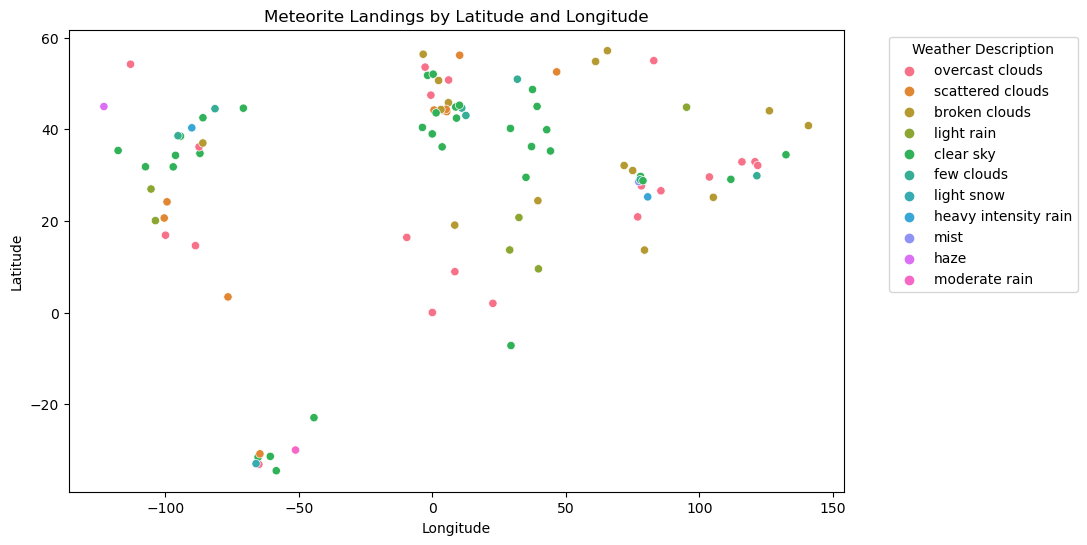

In [54]:
# Visualization 1: Scatter plot of meteorite landings by latitude and longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reclong', y='reclat', hue='WeatherDescription', data=merged_df)
plt.title('Meteorite Landings by Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Weather Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Description:
This scatter plot shows the geographical distribution of meteorite landings based on their latitude and longitude. Each point represents a meteorite landing, and the points are color-coded by the weather description at the time of data retrieval. The plot provides insights into the spatial patterns of meteorite landings and the corresponding weather conditions at those locations.

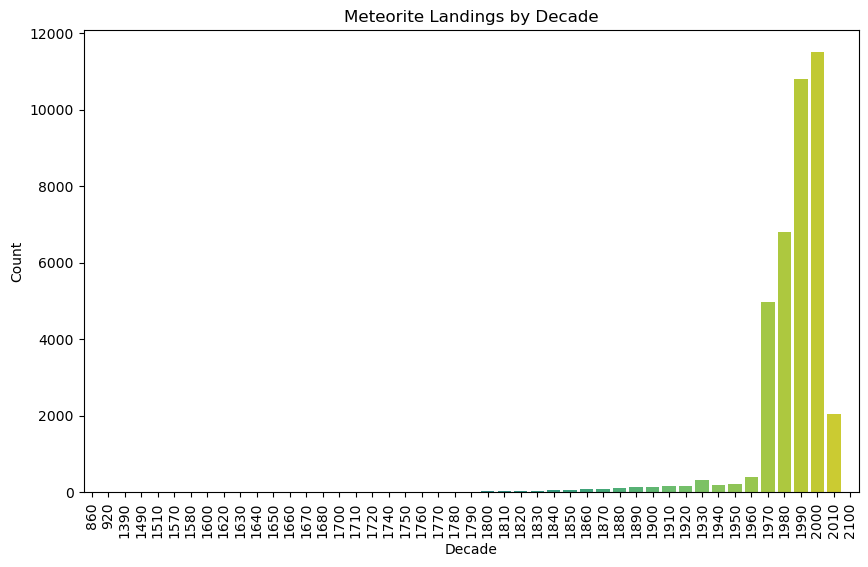

In [58]:
# Visualization 2: Bar plot of meteorite landings by decade
meteorite_df['decade'] = (meteorite_df['year'] // 10) * 10
plt.figure(figsize=(10, 6))
sns.countplot(x='decade', data=meteorite_df, palette='viridis')
plt.title('Meteorite Landings by Decade')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#### Description:
This bar plot aggregates the meteorite landings by decade, providing a clear view of the trends over time. The x-axis represents the decades, and the y-axis represents the count of meteorite landings in each decade. The plot highlights the increase in reported meteorite landings over recent decades, possibly due to improved detection and reporting mechanisms.


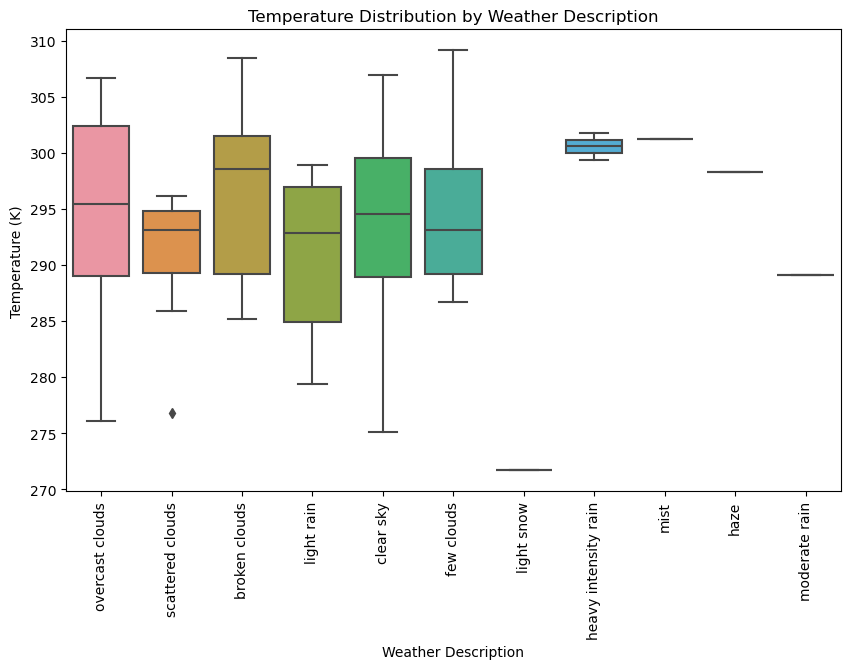

In [56]:
# Visualization 3: Box plot of temperatures by weather description
plt.figure(figsize=(10, 6))
sns.boxplot(x='WeatherDescription', y='Temperature', data=merged_df)
plt.title('Temperature Distribution by Weather Description')
plt.xlabel('Weather Description')
plt.ylabel('Temperature (K)')
plt.xticks(rotation=90)
plt.show()

#### Description:
This box plot displays the distribution of temperatures for different weather descriptions. The x-axis represents the weather descriptions, and the y-axis represents the temperature in Kelvin. The plot shows the median, quartiles, and potential outliers for each weather description category, providing insights into how temperature varies with different weather conditions.

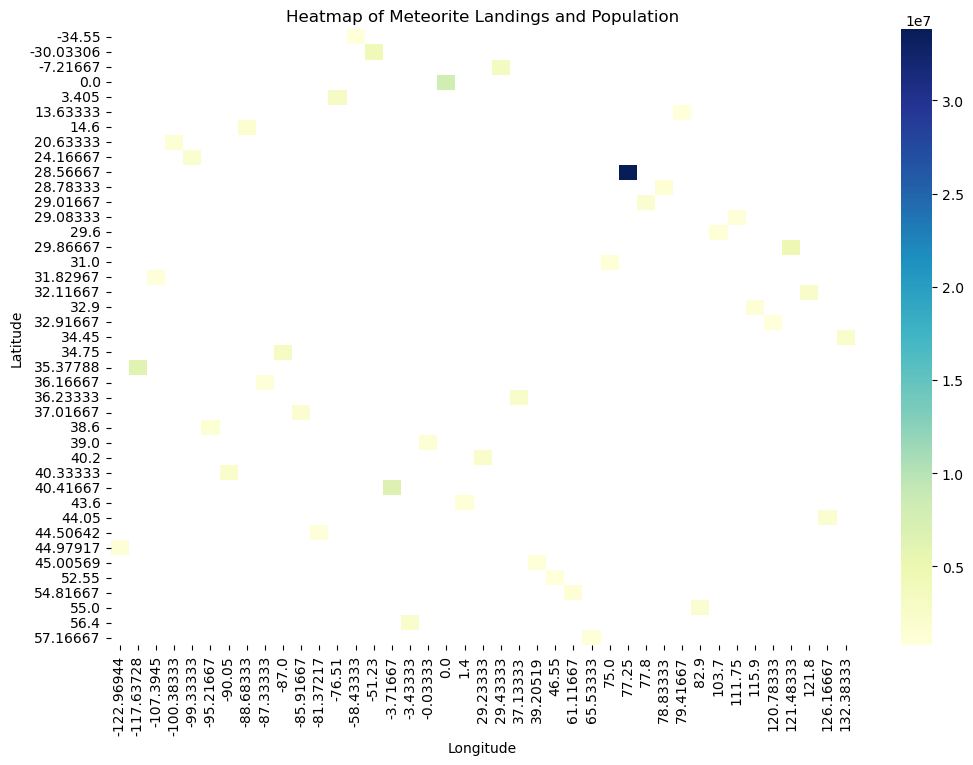

In [57]:
# Visualization 4: Heatmap of meteorite landings and population
heatmap_data = merged_df.pivot_table(values='Population', index='reclat', columns='reclong')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Heatmap of Meteorite Landings and Population')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

#### Description:
This heatmap visualizes the relationship between the geographical locations of meteorite landings and the population density at those locations. The x-axis represents the longitude, and the y-axis represents the latitude. The color intensity indicates the population, with darker shades representing higher populations. The heatmap helps identify regions with higher populations that have experienced meteorite landings, offering potential insights into the impact on populated areas.

## Summary of Project and Ethical Implications

#### What I Learned:
This project involved extensive data wrangling, merging, and visualization to analyze meteorite landings, weather data, and population information. The primary objective was to integrate these diverse datasets into a cohesive and meaningful analysis, which included several key steps:

1. Data Cleaning and Transformation:

* Meteorite landing data was cleaned to standardize column names, handle missing values, and ensure consistency.
* Weather data was fetched from the OpenWeatherMap API based on the geographical coordinates of the meteorite landings.
* Population data was sourced from the World Population Review and cleaned for consistency in city names and other attributes.

2. Data Integration:

* All datasets were loaded into a SQLite database and merged based on common attributes such as geographical coordinates and city names.
* Special attention was given to ensure accurate merging by standardizing city names to lower case and stripping white spaces.

3. Visualization:

* Various visualizations were created to uncover patterns and insights, including scatter plots, bar plots, box plots, and heatmaps.
* These visualizations highlighted the distribution of meteorite landings over time, the relationship between landing locations and weather conditions, and the impact on populated areas.

#### Ethical Implications:
##### Changes Made to the Data:
Several transformations were performed, including standardizing column names, converting temperature units, and handling missing data. These changes improved data quality but also altered the original dataset.

#### Legal or Regulatory Guidelines:
The data used in this project, sourced from the OpenWeatherMap API and the World Population Review, required adherence to their respective usage policies. Compliance with data privacy regulations was crucial, especially when dealing with location-based data.

#### Risks Created Based on Transformations:
The primary risk was potential misinterpretation of the data due to transformations. For instance, incorrect conversion of temperature units or inaccurate merging of datasets could lead to erroneous conclusions. Additionally, reliance on API data, which might not always be up-to-date, posed a risk of inaccuracies.

#### Assumptions in Cleaning/Transforming the Data:
* Assumed that temperature values from the API were in Kelvin.
* Assumed that city names accurately reflected the corresponding weather and population data.
* Assumed that the population data matched the city names provided by the weather data.

#### Data Sourcing and Verification for Credibility:
Data was sourced from reputable APIs and websites, ensuring high credibility. Cross-referencing data from multiple sources helped verify accuracy.

#### Ethical Acquisition of Data:
Data was ethically acquired from publicly accessible APIs and websites, with full adherence to their usage policies.

#### Mitigation of Ethical Implications:
* Documented all transformations and assumptions made during data cleaning to ensure transparency.
* Regularly verified data accuracy and consistency to avoid misinformation.
* Ensured compliance with data usage policies and privacy regulations to protect sensitive information.
* Communicated potential limitations and risks associated with data transformations to stakeholders.

By following these steps and considerations, the data wrangling process maintained ethical standards while supporting the project’s goals.